In [ ]:
#hide
from nbdev import show_doc

In [ ]:
#default_exp esf

# esf
> Documentation for the Elliptical Separability Filter

In [ ]:
#export 
from circle_finder.core import *

In [ ]:
#export

class EllipticalSeparabilityFilter:
    def __init__(self, axes_in, axes_out, angle):
        self.axes_in = axes_in
        self.axes_out = axes_out
        self.angle = angle
        
    def __call__(self, img):
        return seperability_filter(img, self.axes_in, self.axes_out, self.angle)
    
    def find_circles(self, img, num_circles=None):
        sepmap = seperability_filter(img, self.axes_in, self.axes_out, self.angle)
        sepmap[np.isnan(sepmap)]=0
        peaks = peak_local_max(sepmap)
        
        if num_circles is None:
            return peaks
        else:
            return peaks[:num_circles] 
            

## Example using a real image

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
def plot_images(imgs):
    fig, axs = plt.subplots(ncols=len(imgs))
    for i, img in enumerate(imgs):
        ax = axs[i]
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.show()

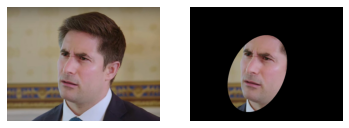

In [ ]:
img = cv.imread('../images/face.jpeg')

angle = 25
center = 500, 500
axes_out = 200, 300
full_region = elliptic_region(img, center, axes_out, angle=angle, as_image=True)

plot_images([img, full_region])

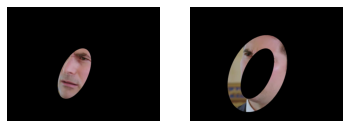

In [ ]:
axes_in = 100, 200

blank_img = np.ones(full_region.shape[:2], dtype='uint8') * 255
mask = elliptic_region(blank_img, center=center, axes=axes_in, as_image=True, crop=False, angle=angle)[:,:,0]
outer_region = cv.bitwise_and(full_region, full_region.copy(), mask=cv.bitwise_not(mask))

inner_region = elliptic_region(full_region, center=center, axes=axes_in, as_image=True, crop=False, angle=angle)
plot_images([inner_region, outer_region])

In [ ]:
csf = EllipticalSeparabilityFilter(axes_in, axes_out, angle)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2, figsize=(8,8))

axs[0,0].imshow(gray, cmap='gray')
axs[0,0].set_title('Grayscale Image')

axs[0,1].imshow(rgb)
axs[0,1].set_title('RGB Image')

res = csf(gray)
axs[1,0].imshow(res)
axs[1,0].set_title('Center Liklihood for Grayscale Image')

res = csf(rgb)
axs[1,1].imshow(res)
axs[1,1].set_title('Center Liklihood for RGB Image')

fig.suptitle(f'Separability Filter for SN ratio of {density}', fontsize=18)
plt.show()

 99%|█████████▉| 449/452 [31:49<00:13,  4.38s/it]

## Example using a dummy image

In [ ]:
size = 75
dummy_im = np.zeros((size, size, 3), np.uint8)
dummy_im[:size//2] = (255,130,255)
dummy_im[size//2:] = (255,255,0)

cv.circle(dummy_im, (size//2, size//2), 8, (0,200,200), thickness=-1)
density = 0.2

noise = np.ceil(scipy.sparse.rand(size, size, density).todense()).astype(np.uint8)
dummy_im +=  np.random.randint(0, 255, size=(size,size,3), dtype=np.uint8) * np.expand_dims(noise, axis=-1)

angle = 25
center = size//2, size//2
axes_out = 16, 16
full_region = elliptic_region(dummy_im, center, axes_out, angle=angle, as_image=True)

plot_images([dummy_im, full_region])

In [ ]:
axes_in = 7, 7

blank_img = np.ones(full_region.shape[:2], dtype='uint8') * 255
mask = elliptic_region(blank_img, center=center, axes=axes_in, as_image=True, crop=False, angle=angle)[:,:,0]
outer_region = cv.bitwise_and(full_region, full_region.copy(), mask=cv.bitwise_not(mask))

inner_region = elliptic_region(full_region, center=center, axes=axes_in, as_image=True, crop=False, angle=angle)
plot_images([inner_region, outer_region])

In [ ]:
#example
csf = EllipticalSeparabilityFilter(axes_in, axes_out, angle)

gray = cv.cvtColor(dummy_im, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(dummy_im, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2, figsize=(8,8))

axs[0,0].imshow(gray, cmap='gray')
axs[0,0].set_title('Grayscale Image')

axs[0,1].imshow(rgb)
axs[0,1].set_title('RGB Image')

res = csf(gray)
axs[1,0].imshow(res)
axs[1,0].set_title('Center Liklihood for Grayscale Image')

res = csf(rgb)
axs[1,1].imshow(res)
axs[1,1].set_title('Center Liklihood for RGB Image')

fig.suptitle(f'Separability Filter for SN ratio of {density}', fontsize=18)
plt.show()